# Clustering

The purpose of this project is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Adult". You can find more information here: https://archive.ics.uci.edu/ml/datasets/adult.
The classification problem is whether they earn more than 50,000$ or not.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the csv file

df = pd.read_csv("clusteringdata.csv")
df.head()
df.shape

(5000, 15)

Preprocessing the data

In [3]:
# Dropping the duplicate Rows
df = df.drop_duplicates(keep = 'first')
df.shape

# Dropping the rows which contains '?' in any of the columns 
for i in df.columns:
    df=df[df[i]!=' ?']
df.shape

C:\Users\nandu\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(4579, 15)

In [4]:
# Changing the income column into Numerical Value
df['Class'] = df['Class'].map({' <=50K':0, ' >50K':1})
df['Class'].value_counts()

0    3421
1    1158
Name: Class, dtype: int64

In [5]:
# Changing the Categorical Values to Numerical values using the Label Encoder
df_onehot = df.copy()
df_onehot_label=df_onehot['Class']
df_onehot_features=df_onehot.drop('Class',axis=1)
categorical_features=list(df_onehot_features.select_dtypes(include=['object']).columns)
df_onehot_features = pd.get_dummies(df_onehot_features, columns=categorical_features)
df_onehot_features.head(3)




,Age,Fnlwght,EducationNumber,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,...,NativeCountry_ Portugal,NativeCountry_ Puerto-Rico,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

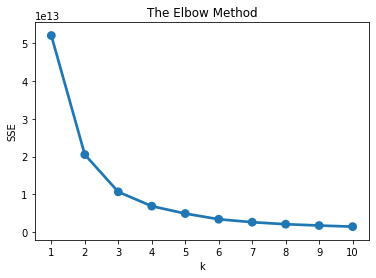

In [6]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
# Import key libraries 
from sklearn.cluster import KMeans 
import seaborn as sns 
from matplotlib import pyplot as plt 

# Fit KMeans and calculate SSE for each k 
sse = {} 
for k in range(1, 11):     
    kmeans = KMeans(n_clusters=k, random_state=1)     
    kmeans.fit(df_onehot_features)     
    sse[k] = kmeans.inertia_ 
# sum of squared distances to closest cluster cente
# Plot SSE for each k 
plt.title('The Elbow Method') 
plt.xlabel('k'); 
plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show()



### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [7]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!

from sklearn.model_selection import train_test_split


# # Splitting the dataset into 70% for training data, and 30% for testing data the classifier
X_train, X_test, Y_train, Y_test = train_test_split(df_onehot_features,df_onehot_label, test_size=0.30, random_state=100)
print(Y_train.head(2))
###################end code for Task 1-b-1

647     0
2383    0
Name: Class, dtype: int64


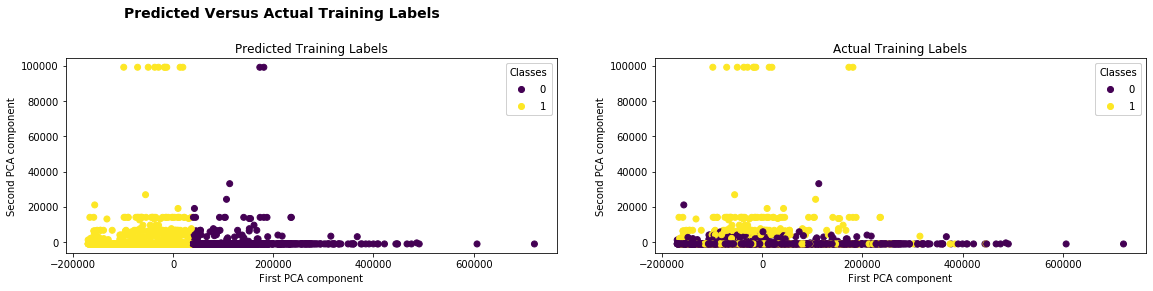

In [16]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#model and fit the data to PCA model 
X_train_pca = PCA(n_components=2).fit_transform(X_train)
# Create the KMeans model
clst=KMeans(init='k-means++',n_clusters=2,random_state=42)
# Compute cluster centers and predict cluster index for each sample 
clusters1=clst.fit_predict(X_train)
# Model and fit the data to the PCA model


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]


fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=2)
# Add scatterplots to the subplots 
s=ax[0].scatter(x, y, c=clusters1)

ax[0].set_title('Predicted Training Labels')


ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for a in ax.flat:
    a.set(xlabel='First PCA component', ylabel='Second PCA component')
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)

# Show the plots

plt.show()
###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

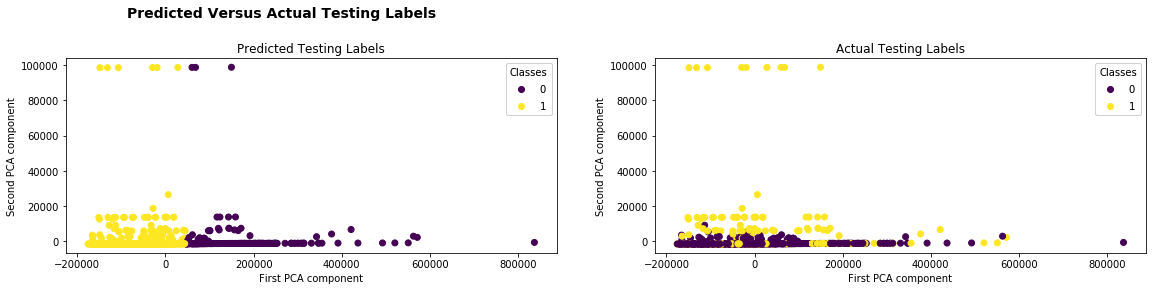

In [9]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
clusters2=clst.fit_predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA().fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Predicted Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=2)

# Add scatterplots to the subplots 
s=ax[0].scatter(x, y, c=clusters2)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(x, y, c=Y_test)
ax[1].set_title('Actual Testing Labels')

for a in ax.flat:
    a.set(xlabel='First PCA component', ylabel='Second PCA component')
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)


# Show the plots
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [10]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix for training labels: \n",confusion_matrix(Y_train,clusters1),'\n')
print("Confusion Matrix for testing labels: \n",confusion_matrix(Y_test,clusters2),'\n')
###################end code for Task 1-b-4

Confusion Matrix for training labels: 
 [[ 724 1672]
 [ 207  602]] 

Confusion Matrix for testing labels: 
 [[286 739]
 [ 85 264]] 



# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [17]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score,accuracy_score



## Calculate pairwise distance matrix for X_train



pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine

cos_com = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="complete")
pred = cos_com.fit_predict(X_train)

#pred = cos_com.predict(X_test)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean

euc_com = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
pred1 = euc_com.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
manh_com = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="complete")
pred2 = manh_com.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="average")
pred3 = cos_avg.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="average")
pred4 = euc_avg.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manh_avg = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="average")
pred5 = manh_avg.fit_predict(X_train)



print("F1-score for complete linkage + cosine       ", f1_score(Y_train,pred))
print("F1-score for complete linkage + euclidean    ", f1_score(Y_train, pred1))
print("F1-score for complete linkage + manhattan    ", f1_score(Y_train, pred2))
print("F1-score for average linkage + cosine        ", f1_score(Y_train, pred3))
print("F1-score for average linkage + euclidean     ", f1_score(Y_train, pred4))
print("F1-score for average linkage + manhattan     ", f1_score(Y_train, pred5))




###################end code for Task 2-a

[[     0.          47675.00761405  40502.00322206 ...  42644.03444797
  189957.00292961  36717.00103494]
 [ 47675.00761405      0.          88177.00079953 ...   5031.16378187
  237632.00049446  84392.00258318]
 [ 40502.00322206  88177.00079953      0.         ...  83146.01126332
  149455.00120438   3785.01360632]
 ...
 [ 42644.03444797   5031.16378187  83146.01126332 ...      0.
  232601.00147678  79361.01316768]
 [189957.00292961 237632.00049446 149455.00120438 ... 232601.00147678
       0.         153240.00205234]
 [ 36717.00103494  84392.00258318   3785.01360632 ...  79361.01316768
  153240.00205234      0.        ]]
F1-score for complete linkage + cosine        0.398400399900025
F1-score for complete linkage + euclidean     0.4057897409852717
F1-score for complete linkage + manhattan     0.014134275618374558
F1-score for average linkage + cosine         0.398400399900025
F1-score for average linkage + euclidean      0.0024449877750611243
F1-score for average linkage + manhattan    

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

Confusion Matrix: 
 [[  66 2330]
 [  10  799]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.03      0.05      2396
           1       0.26      0.99      0.41       809

    accuracy                           0.27      3205
   macro avg       0.56      0.51      0.23      3205
weighted avg       0.71      0.27      0.14      3205



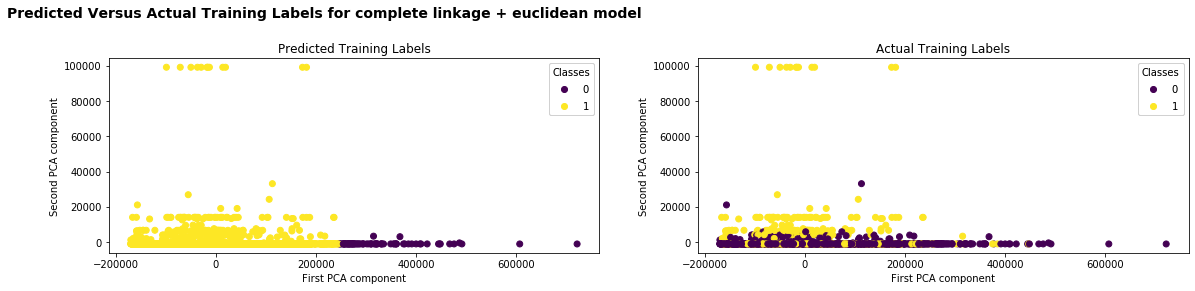

In [19]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 


x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Predicted Versus Actual Training Labels for complete linkage + euclidean model', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=2)

# Add scatterplots to the subplots 
s=ax[0].scatter(x, y, c=pred1)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for a in ax.flat:
    a.set(xlabel='First PCA component', ylabel='Second PCA component')
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)
print("Confusion Matrix: \n",confusion_matrix(Y_train,pred1),'\n')
print("Classification Report: \n",classification_report(Y_train,pred1))


# Show the plots
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[[     0.           6189.43931225 138147.10710326 ... 134621.55541369
  168378.03705056  22673.47878028]
 [  6189.43931225      0.         132335.00339668 ... 128809.0029501
  162569.00864556  28364.03259411]
 [138147.10710326 132335.00339668      0.         ...   3526.01262051
   30234.00906264 160699.00197885]
 ...
 [134621.55541369 128809.0029501    3526.01262051 ...      0.
   33760.01257405 157173.00114205]
 [168378.03705056 162569.00864556  30234.00906264 ...  33760.01257405
       0.         190933.00277061]
 [ 22673.47878028  28364.03259411 160699.00197885 ... 157173.00114205
  190933.00277061      0.        ]]


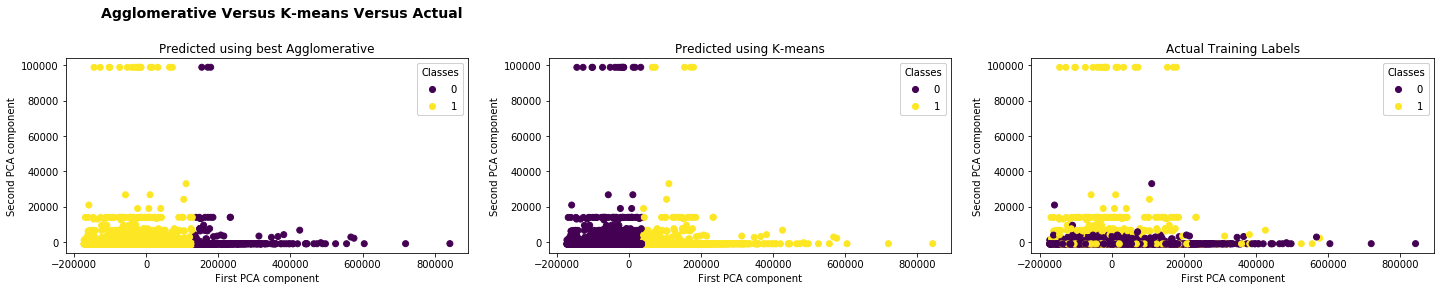

In [24]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

# Create the KMeans model
clst=KMeans(init='k-means++',n_clusters=2,random_state=42)
# Compute cluster centers and predict cluster index for each sample 
cluster=clst.fit_predict(df_onehot_features)


### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pairwise_dist = pairwise_distances(df_onehot_features)
print(pairwise_dist)


# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
euc_com = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
predicted = euc_com.fit_predict(df_onehot_features)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(df_onehot_features)


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

x = X_pca[:, 0]
y = X_pca[:, 1]
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle('Agglomerative Versus K-means Versus Actual', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=2.5)

# Add scatterplots to the subplots 
s=ax[0].scatter(x, y, c=predicted)
ax[0].set_title('Predicted using best Agglomerative')
ax[1].scatter(x, y, c=cluster)
ax[1].set_title('Predicted using K-means')
ax[2].scatter(x, y, c=df_onehot_label)
ax[2].set_title('Actual Training Labels')

for a in ax.flat:
    a.set(xlabel='First PCA component', ylabel='Second PCA component')
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)


# Show the plots
plt.show()




###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [23]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix: \n",confusion_matrix(df_onehot_label,cluster),'\n')
print("Classification Report: \n",classification_report(df_onehot_label,cluster))



print("Confusion Matrix: \n",confusion_matrix(df_onehot_label,predicted),'\n')
print("Classification Report: \n",classification_report(df_onehot_label,predicted))






###################end code for Task 3-b

Confusion Matrix: 
 [[2412 1009]
 [ 867  291]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      3421
           1       0.22      0.25      0.24      1158

    accuracy                           0.59      4579
   macro avg       0.48      0.48      0.48      4579
weighted avg       0.61      0.59      0.60      4579

Confusion Matrix: 
 [[   1 3420]
 [  21 1137]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.05      0.00      0.00      3421
           1       0.25      0.98      0.40      1158

    accuracy                           0.25      4579
   macro avg       0.15      0.49      0.20      4579
weighted avg       0.10      0.25      0.10      4579

